# POMO: Train and test on OP and SDVRP

In this notebook we will train and test the POMO model on the Orienteering Problem (OP) environment and SDVRP environment.

## Section 1: POMO for OP

In [1]:
# SECTION: Imports
import torch
from rl4co.envs import OPEnv
from rl4co.models.zoo import POMO
from rl4co.utils.trainer import RL4COTrainer

/home/cbhua/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# SECTION: Init environment and model
env = OPEnv(num_loc=20, max_length=10)

model = POMO(
    env, 
    train_data_size=100_000,
    val_data_size=10_000,
    num_starts=20,
    num_augment=1,
) 

/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.


### Test greedy rollout with untrained model and plot

Problem 1 | Reward: 0.000
Problem 2 | Reward: 0.000
Problem 3 | Reward: 9.850


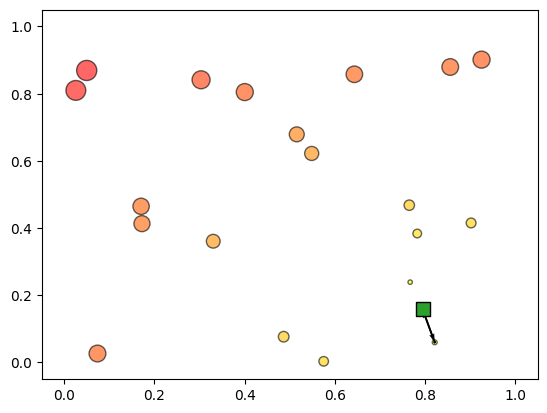

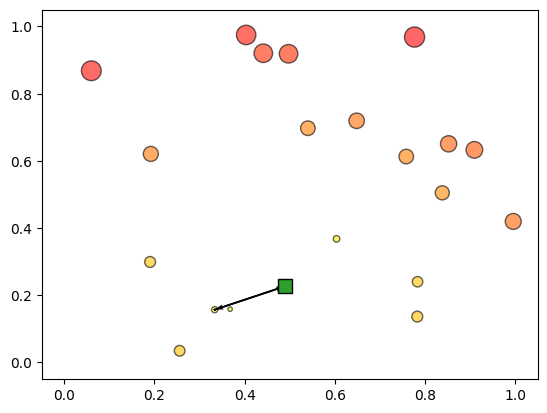

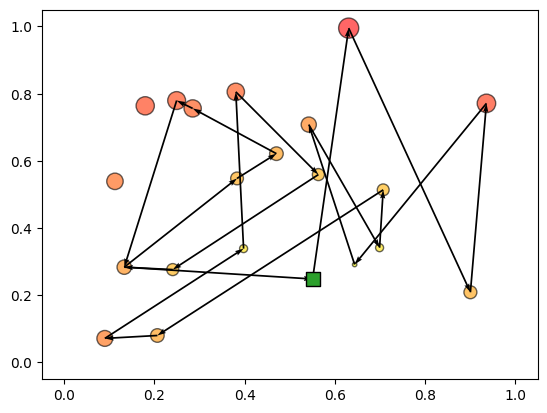

In [3]:
# Greedy rollouts over untrained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
td_init = env.reset(batch_size=[3]).to(device)
model = model.to(device)
out = model(td_init.clone(), phase="test", decode_type="greedy", return_actions=True)
actions_untrained = out['actions'].cpu().detach()
rewards_untrained = out['reward'].cpu().detach()

for i in range(3):
    print(f"Problem {i+1} | Reward: {rewards_untrained[i]:.3f}")
    env.render(td_init[i], actions_untrained[i])

### Set the trainer and train the model

In [4]:
trainer = RL4COTrainer(
    max_epochs=3,
    accelerator="gpu",
    devices=1,
    logger=None,
)
trainer.fit(model)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


val_file not set. Generating dataset instead
test_file not set. Generating dataset instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type           | Params
--------------------------------------------
0 | env      | OPEnv          | 0     
1 | policy   | POMOPolicy     | 1.3 M 
2 | baseline | SharedBaseline | 0     
--------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.156     Total estimated model params size (MB)


/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Epoch 2: 100%|██████████| 196/196 [00:13<00:00, 14.11it/s, v_num=8, train/reward=11.50, train/loss=-3.43e-6, val/reward=11.50]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 196/196 [00:14<00:00, 13.23it/s, v_num=8, train/reward=11.50, train/loss=-3.43e-6, val/reward=11.50]


### Test trained model and plot

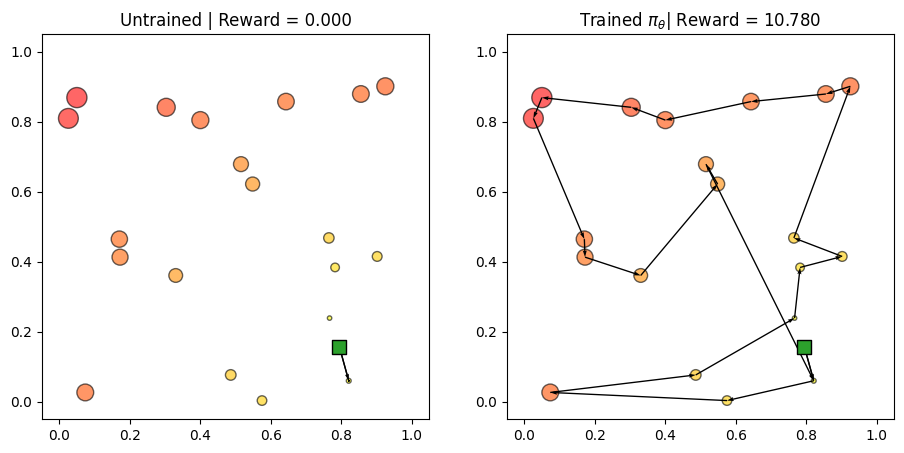

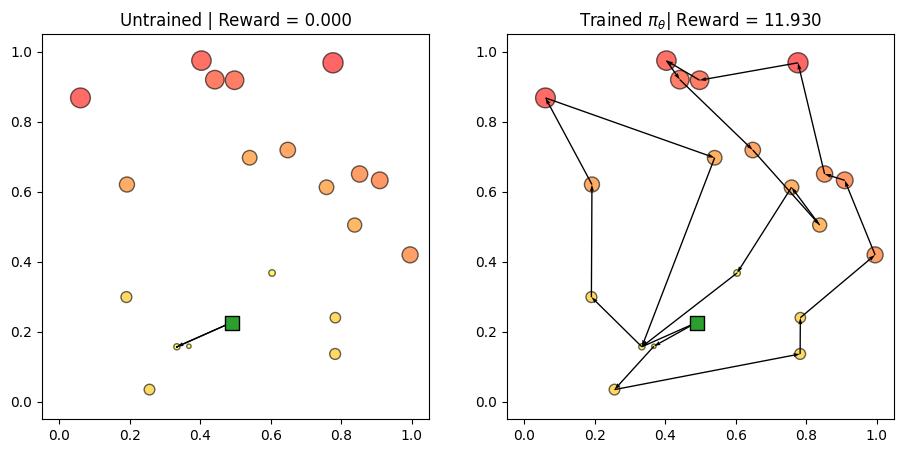

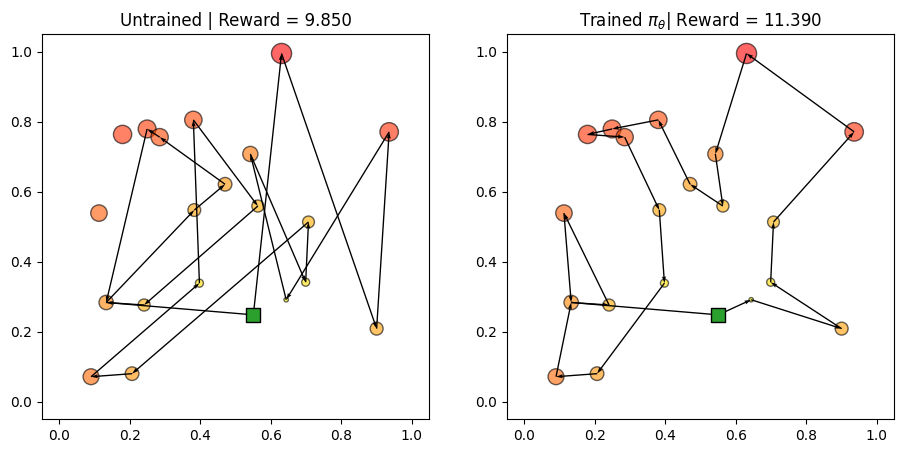

In [7]:
# Greedy rollouts over trained model (same states as previous plot)
model = model.to(device)
out = model(td_init.clone(), phase="test", decode_type="greedy", return_actions=True)
actions_trained = out['actions'].cpu().detach()

# Plotting
import matplotlib.pyplot as plt
for i, td in enumerate(td_init):
    fig, axs = plt.subplots(1,2, figsize=(11,5))
    env.render(td, actions_untrained[i], ax=axs[0]) 
    env.render(td, actions_trained[i], ax=axs[1])
    axs[0].set_title(f"Untrained | Reward = {rewards_untrained[i].item():.3f}")
    axs[1].set_title(r"Trained $\pi_\theta$" + f"| Reward = {out['reward'][i].item():.3f}")

## Section 2: POMO for SDVRP

In [8]:
# SECTION: Imports
import torch
from rl4co.envs import SDVRPEnv
from rl4co.models.zoo import POMO
from rl4co.utils.trainer import RL4COTrainer

In [9]:
# SECTION: Init environment and model
env = SDVRPEnv(num_loc=20)

model = POMO(
    env, 
    train_data_size=100_000,
    val_data_size=10_000,
    num_starts=20,
    num_augment=1,
) 

/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.


### Test greedy rollout with untrained model and plot

Problem 1 | Cost: 25.145
Problem 2 | Cost: 17.755
Problem 3 | Cost: 17.124


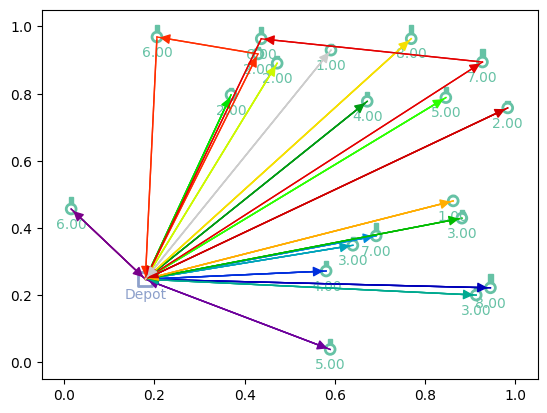

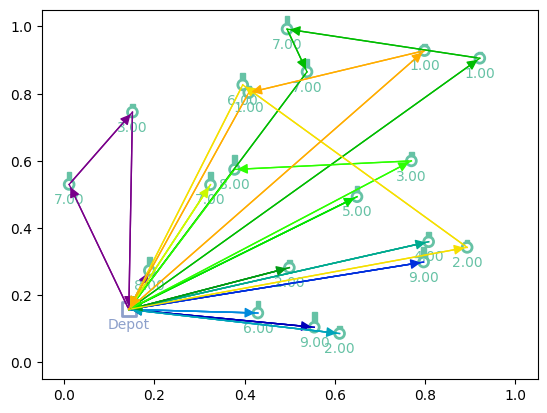

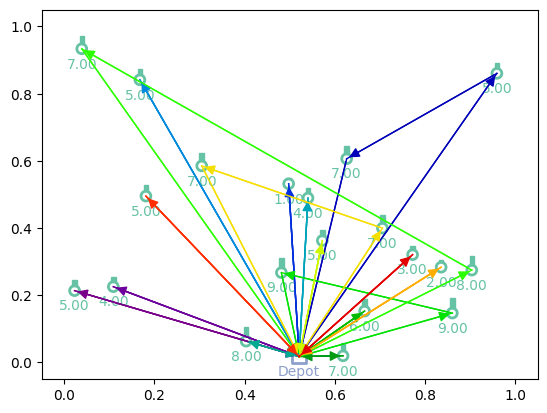

In [11]:
# Greedy rollouts over untrained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
td_init = env.reset(batch_size=[3]).to(device)
model = model.to(device)
out = model(td_init.clone(), phase="test", decode_type="greedy", return_actions=True)
actions_untrained = out['actions'].cpu().detach()
rewards_untrained = out['reward'].cpu().detach()

for i in range(3):
    print(f"Problem {i+1} | Cost: {-rewards_untrained[i]:.3f}")
    env.render(td_init[i], actions_untrained[i])

### Set the trainer and train the model

In [12]:
trainer = RL4COTrainer(
    max_epochs=3,
    accelerator="gpu",
    devices=1,
    logger=None,
)
trainer.fit(model)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
val_file not set. Generating dataset instead
test_file not set. Generating dataset instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type           | Params
--------------------------------------------
0 | env      | SDVRPEnv       | 0     
1 | policy   | POMOPolicy     | 1.3 M 
2 | baseline | SharedBaseline | 0     
--------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.157     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


/home/cbhua/miniconda3/envs/rl4co-user/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Epoch 2: 100%|██████████| 196/196 [00:57<00:00,  3.43it/s, v_num=9, train/reward=-7.09, train/loss=-.517, val/reward=-6.93]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s, v_num=9, train/reward=-7.09, train/loss=-.517, val/reward=-6.93]


### Test trained model and plot

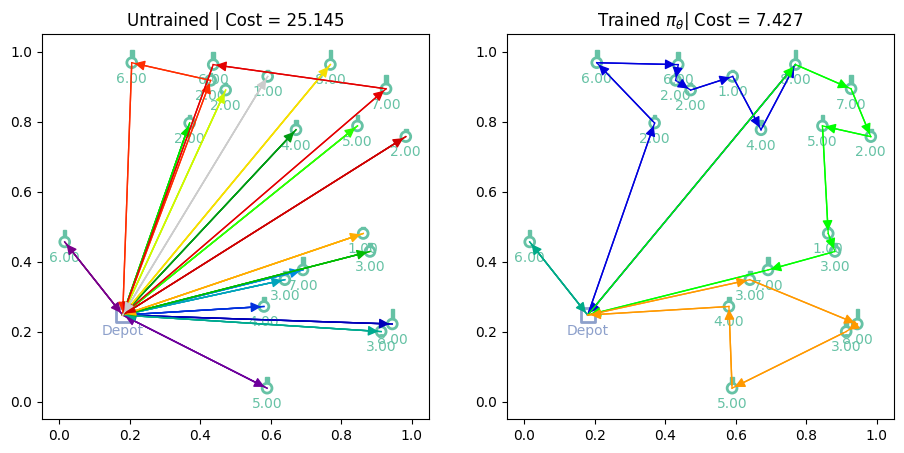

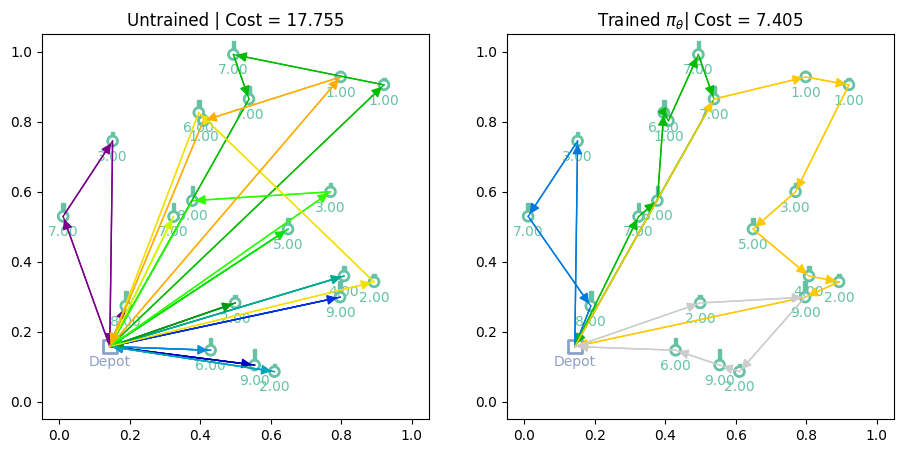

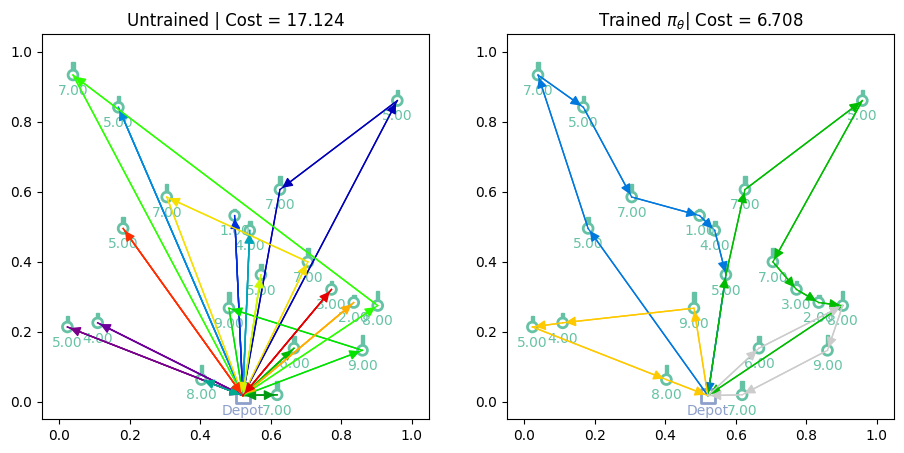

In [13]:
# Greedy rollouts over trained model (same states as previous plot)
model = model.to(device)
out = model(td_init.clone(), phase="test", decode_type="greedy", return_actions=True)
actions_trained = out['actions'].cpu().detach()

# Plotting
import matplotlib.pyplot as plt
for i, td in enumerate(td_init):
    fig, axs = plt.subplots(1,2, figsize=(11,5))
    env.render(td, actions_untrained[i], ax=axs[0]) 
    env.render(td, actions_trained[i], ax=axs[1])
    axs[0].set_title(f"Untrained | Cost = {-rewards_untrained[i].item():.3f}")
    axs[1].set_title(r"Trained $\pi_\theta$" + f"| Cost = {-out['reward'][i].item():.3f}")